# GARCH Volatility Modeling for Option Pricing

In [2]:
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

data = yf.download("AAPL", start="2020-01-01", end="2022-07-31")

adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

model = arch_model(returns)

res = model.fit()

[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.741460403239
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22626.956751342776
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1786.8123037617763
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1628.76024949219
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1391.356031382026
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1386.023752197881
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1386.0231193220418
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1386.0230883981349
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1386.023087574855
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1386.023087574855
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


In [3]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Sat, Oct 01 2022   Df Residuals:                      647
Time:                        16:03:08   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.860e-02      2.774  5.541e-03 [6.397e-0

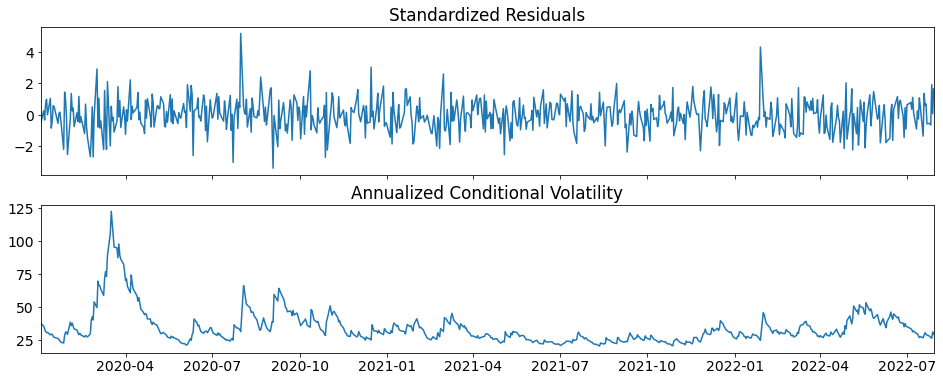

In [4]:
fig = res.plot("D")

In [5]:
# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]

# compute the annualized volatility forecast
volatility_forecast = np.sqrt(variance_forecast)
annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100

In [6]:
print(volatility_forecast)
print(annualized_volatility_forecast)

2.0763586706456887
0.3296117205060697


In [7]:
def _get_option_value(series):
    """ Return the option value given the OptionType

    :param series: row of the dataframe, accessible by label
    :return: Black-Scholes option value

    """
    option_type = series["OptionType"]
    S = series["UnderlyingPrice"]
    K = series["Strike"]
    r = series["InterestRate"]
    t = series["TimeUntilExpiration"]
    vol = series["ImpliedVolatilityMid"]

    meth_name = "black_scholes_{0}_value".format(option_type)
    return float(globals().get(meth_name)(S, K, r, t, vol))

In [8]:
options_frame["TheoreticalValue"] = options_frame.apply(_get_option_value, axis=1)

NameError: name 'options_frame' is not defined